In [6]:
import numpy as np
import pandas as pd

In [7]:
dfs = [pd.read_csv(f"data/round-1-island-data-bottle/prices_round_1_day_{i}.csv", sep=';') for i in range(-2,1)]

df = pd.DataFrame()
for i in range(len(dfs)):
    dfs[i]['alltime'] = dfs[i]['day'] * 1e6 + dfs[i]['timestamp']
    df = pd.concat([df, dfs[i]], ignore_index=True)

<Axes: title={'center': 'KELP price over time'}, xlabel='alltime'>

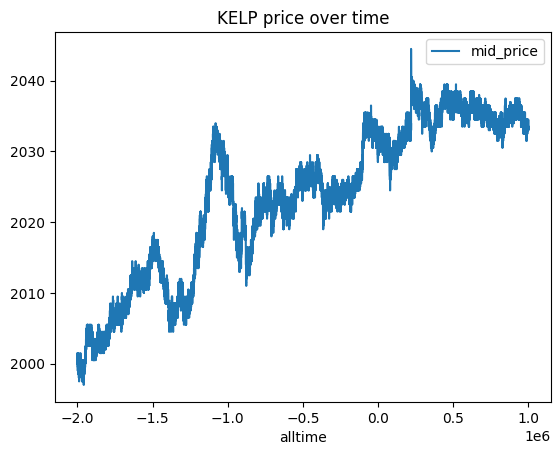

In [12]:
df.loc[df['product']=='KELP'].plot(x='alltime', y='mid_price', title='KELP price over time')

<Axes: title={'center': 'SQUID_INK price over time'}, xlabel='alltime'>

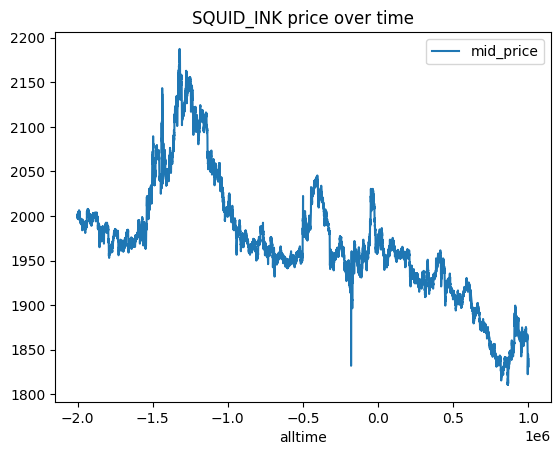

In [13]:
df.loc[df['product']=='SQUID_INK'].plot(x='alltime', y='mid_price', title='SQUID_INK price over time')

/var/folders/zf/qg0wtkdx0x5g8906n_vgw1z40000gn/T/ipykernel_23722/963886136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_df['rowing_avg'] = squid_df['mid_price'].rolling(5).mean()
/var/folders/zf/qg0wtkdx0x5g8906n_vgw1z40000gn/T/ipykernel_23722/963886136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_df['bid_diff'] = squid_df['bid_price_1'] - squid_df['rowing_avg']
/var/folders/zf/qg0wtkdx0x5g8906n_vgw1z40000gn/T/ipykernel_23722/963886136.py:4: SettingWithCopyWarning: 
A value is tryi

<Axes: title={'center': 'SQUID_INK price diff from rolling average'}, xlabel='alltime'>

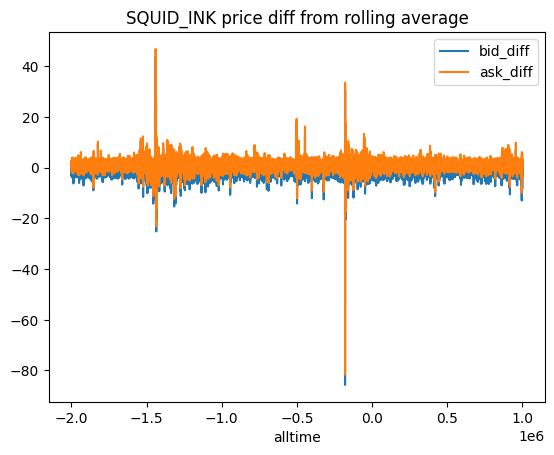

In [20]:
squid_df = df.loc[df['product']=='SQUID_INK']
squid_df['rowing_avg'] = squid_df['mid_price'].rolling(5).mean()
squid_df['bid_diff'] = squid_df['bid_price_1'] - squid_df['rowing_avg']
squid_df['ask_diff'] = squid_df['ask_price_1'] - squid_df['rowing_avg']

squid_df.plot(x='alltime', y=['bid_diff', 'ask_diff'], title='SQUID_INK price diff from rolling average')